<center> <h1>Homework 3 | DATA 5600</h1> </center>
<center> <h2>Simple Linear Regression Model Inference</h2> </center>
<center> <h3> Dallin Moore <h3> <center>

## Data and Description

### This data set is the same data set used in Homework 2. In this assignment, we will interpret the model you built in Homework 2.

One key component of determining appropriate speed limits is the amount of distance that is required to stop at a given speed. For example, in residential neighborhoods, when pedestrians are commonly in the roadways, it is important to be able to stop in a very short distance to ensure pedestrian safety. The speed of vehicles may be useful for determining the distance required to stop at that given speed, which can aid public officials in determining speed limits.

The Stopping Distance data set compares the **distance (column 2)** (in feet) required for a car to stop on a certain rural road against the **speed (column 1)** (MPH) of the car. Download the StoppingDistance.txt file from Canvas, and put it in the same folder as this Jupyter file.

#### 0. Replace the text "\< PUT YOUR NAME HERE \>" with your full name. Load necessary libraries below.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

#### 1. Read in the data set, and call the dataframe "stop". Print the first few rows of the data. Print a summary of the data and make sure the data makes sense.

In [2]:
stop = pd.read_csv("StoppingDistance.txt", sep=" ")
stop.head()

,Speed,Distance
0,4,4
1,5,2
2,5,4
3,5,8
4,5,8


#### 2. What transformation(s) did you apply to X, Y, or both in Homework 2? If you applied a transformation to Y, explain how you would back-transform model predictions to get back to the original scale of Y.
##### (If you would like to change your model for some reason, you may do so, just make a note of the change here.)

I applied square-root transformation to the Distance column (Y). To get Y by itself again, the right side as sqaured as seen in the formula below.


The formula:

$
\hat{\text{Distance}}_i = (\text{0.9324} + ( \text{0.2525} \cdot \text{Speed}_i ))^2 + \epsilon_i
$


#### 3. Copy and paste the code you used in Homework 2 (Question 14) to fit your final, transformed model. Print a summary of the results.

In [4]:
# Apply square-root transformation to the Distance column
stop['Distance_trans'] = np.sqrt(stop['Distance'])
y = stop['Distance_trans']
X = sm.add_constant(stop['Speed'])

# Fit the linear regression model
mod = sm.OLS(y, X)
res_trans = mod.fit()

res_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Distance_trans   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     741.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.83e-35
Time:                        12:05:18   Log-Likelihood:                -66.669
No. Observations:                  62   AIC:                             137.3
Df Residuals:                      60   BIC:                             141.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9324      0.198      4.711      0.000       0.537       1.328
Speed          0.2525      0.009     27.223      0.000       0.234       0.271
==============================================================================
Omnibus:                        1.777   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.239
Skew:                           0.029   Prob(JB):                        0.538
Kurtosis:                       2.310   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4. Make sure the residuals and fitted values are saved to the `stop` dataframe. Also, save the back-transformed fitted values to the `stop` dataframe (following the process you outlined in Question 2 of this assignment). These values should be fitted values on the original scale of the response variable. Print out the first few rows of the `stop` dataframe.

In [24]:
# Add transformed residuals and fitted values to the dataframe
stop['residuals_trans'] = res_trans.resid
stop['fittedvalues_trans'] = res_trans.fittedvalues

# Add back transformed residuals and fitted values to the dataframe
stop['fittedvalues_back'] = stop['fittedvalues_trans'] ** 2
# stop['residuals_back'] = (stop['fittedvalues_trans'] + stop['residuals_trans']) ** 2 # this is wrong?
stop['residuals_back'] = stop['Distance'] - stop['fittedvalues_back']

stop.head()

,Speed,Distance,Distance_trans,residuals_trans,fittedvalues_trans,fittedvalues_back,residuals_back
0,4,4,2.000000,0.057740,1.942260,3.772373,0.227627
1,5,2,1.414214,-0.780512,2.194726,4.816821,-2.816821
2,5,4,2.000000,-0.194726,2.194726,4.816821,-0.816821
3,5,8,2.828427,0.633701,2.194726,4.816821,3.183179
4,5,8,2.828427,0.633701,2.194726,4.816821,3.183179


#### 5. Copy and paste the code you used in Homework 2 (Question 20) to plot your final, transformed model on a scatterplot of the data. Then, alter the code so the plot is saved as a function that can be called throughout the rest of the assignment. Call the function here to print the plot (it should look like the plot you made in Homework 2, Question 20).

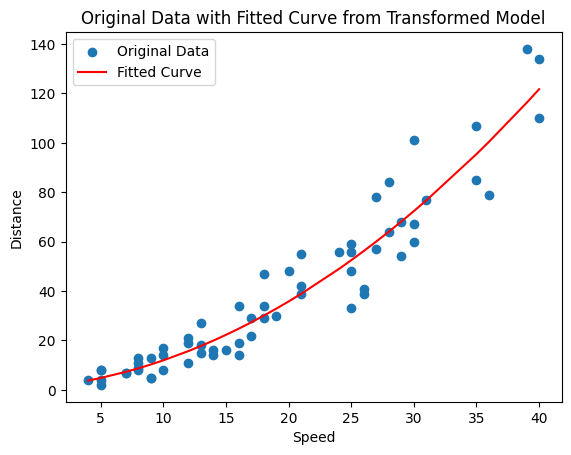

In [19]:
def plot_model(df, x_column, y_column, y_fitted):
    # Plot the original data
    plt.scatter(stop[x_column], stop[y_column], label='Original Data')

    # Plot the fitted curve on the original scale
    plt.plot(stop[x_column], stop[y_fitted], color='red', label='Fitted Curve')

    # Labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title('Original Data with Fitted Curve from Transformed Model')
    plt.legend()

plot_model(stop, 'Speed', 'Distance', 'fittedvalues_back')
plt.show()

#### 6. Call (print) the 95% confidence interval for the slope as reported in the summary output. Interpret this interval. (If you used a log transform, interpret as outlined in the course notes. If you used a different transformation, you can leave the units on the transformed scale).

In [10]:
# Get the 95% confidence interval for the slope (β1)
slope_conf_int = res_trans.conf_int().iloc[1]

slope_conf_int

0    0.233915
1    0.271017
Name: Speed, dtype: float64

With 95% confidence, the average increase in stopping distance lies between 0.233915 and 0.271017 feet for every 1 MPH increase in speed.

#### 7. Based on the confidence interval, does an increase in speed *significantly* increase distance needed to stop? Why or why not?

Yes, an increase in speed does significantly increase distance needed stop because the confidence interval does not include 0.

#### 8. Call (print) the test stastistic and corresponding p-value from the hypothesis test for the slope. Interpret the test results.

In [12]:
# Extract the t-statistic and p-value for the slope (β1)
slope_t_stat = res_trans.tvalues.iloc[1]
slope_p_value = res_trans.pvalues.iloc[1]

# Print the test statistic and p-value
print(f"Test statistic for the slope: {slope_t_stat}")
print(f"P-value for the slope: {slope_p_value}")

Test statistic for the slope: 27.222930689501034
P-value for the slope: 1.8261072779616222e-35


The p-value is much less than 0.05, so we reject the null hypothesis. This provides strong evidence that there is a statistically significant relationship between speed and stopping distance. For every 1 MPH increase in speed, the stopping distance significantly increases. The t-statistic shows that the estimated slope is 27.22 standard deviations away from 0 whcih means there is very strong evidence against the null hypothesis (that the slope is 0).

#### 9. Compute, print, *and interpret* a 95% confidence interval for the average of $Y$ (on the original scale) when $x_i=30$.

In [15]:
pred = res_trans.get_prediction([1, 30])
np.square(pred.summary_frame(alpha = 0.05).loc[:, ['mean_ci_lower', 'mean_ci_upper']])

,mean_ci_lower,mean_ci_upper
0,67.750537,77.117897


With 95% confidence, the average stopping distance lies between 67.750537 and 77.117897 feet when speed is 30 MPH.

#### 10. Create a confidence band for the average of $Y$ across *all* values of $X$, and overlay this band (using a distinct color) on the scatterplot you created in Question 5 of this assignment. Print the plot.

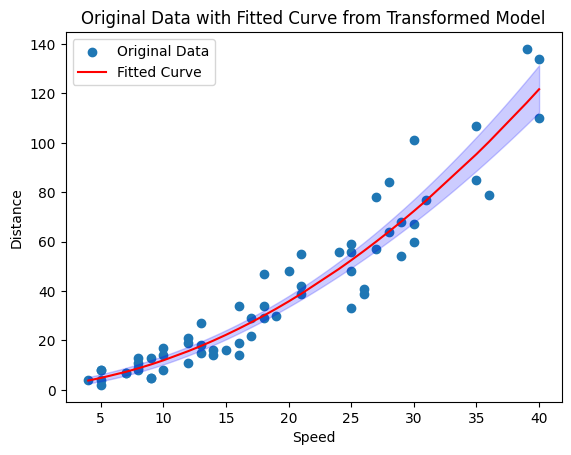

In [21]:
# Define Speed values to predict
x = np.linspace(min(stop['Speed']), max(stop['Speed']), num=200)
X = np.vstack((np.ones(200), x)).T  # Add intercept for predictions

# Predict and store results with confidence intervals
pred_trans = res_trans.get_prediction(X).summary_frame(alpha=0.05)

# Back-transform the fitted values and confidence intervals
pred_trans['mean'] = np.square(pred_trans['mean'])  # Back-transform fitted values
pred_trans['mean_ci_lower'] = np.square(pred_trans['mean_ci_lower'])  # Lower CI
pred_trans['mean_ci_upper'] = np.square(pred_trans['mean_ci_upper'])  # Upper CI

# Create a new column for the back-transformed fitted values in stop DataFrame
stop['fittedvalues_back'] = np.square(res_trans.fittedvalues)

# Plot the predictions
plot_model(stop, 'Speed', 'Distance', 'fittedvalues_back')

# Fill the area between the confidence intervals
plt.fill_between(x, 
                 pred_trans['mean_ci_lower'], 
                 pred_trans['mean_ci_upper'], 
                 color='blue',
                 alpha=0.2)

plt.show()

#### 11. Compute, print, *and interpret* a 95% prediction interval for $Y$ (on the original scale) when $x_i=30$.

In [22]:
pred = res_trans.get_prediction([1, 30])
np.square(pred.summary_frame(alpha = 0.05).loc[:, ['obs_ci_lower', 'obs_ci_upper']])

,obs_ci_lower,obs_ci_upper
0,49.537672,99.489666


With 95% confidence, a randomly selected vehicle traveling 30 MPH is expected to have a stopping distance between 49.537672 feet and 99.489666 feet.

#### 12. Create a prediction band for $Y$ across *all* values of $X$, and overlay this band (using a distinct color) on the scatterplot you created in Question 5 of this assignment. Print the plot.

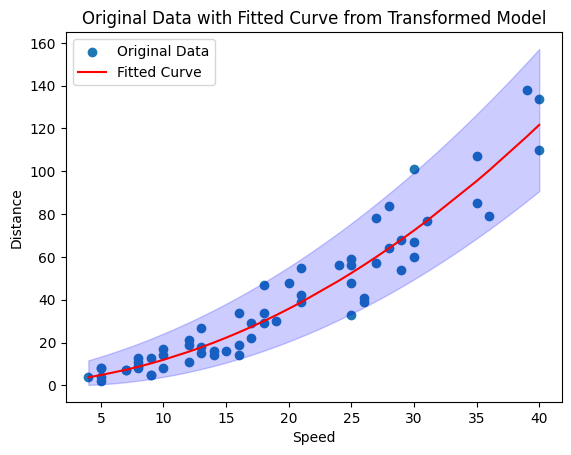

In [23]:
plot_model(stop, 'Speed', 'Distance', 'fittedvalues_back')

plt.fill_between(x, 
                 np.square(pred_trans['obs_ci_lower']), 
                 np.square(pred_trans['obs_ci_upper']), 
                 color = 'blue',
                 alpha = 0.2)
plt.show()

#### 13. Briefly explain how/why the prediction band differs from the confidence band.

The prediction band reflects the range of values that are expected for individual observations at a given value of the predictor variable. It accounts for the variability and uncertainty in the individual data points around the fitted regression line.

The confidence band represents the range within which we expect the true mean of the predicted values to lie for a given value of the predictor variable. 

#### 14. Compute and print the MSE (Mean Square Error).

In [37]:
# Calculate the Mean Squared Error (MSE)
mse = np.sum(stop['residuals_back']**2) / (len(stop) - 2)
print(mse)

97.2390963721964


#### 15. Briefly explain (1) what the MSE estimates and (2) a drawback to using it as a model evaluation metric.

##### (1) What the MSE Estimates
MSE estimates true error variance (INCORRECT: the average squared difference between the actual observed values and the values predicted by the model). It shows how well a regression model predicts the response variable in a numeric form. A lower MSE indicates that the model's predictions are closer to the actual values, reflecting better model performance. In essence, MSE provides a measure of prediction accuracy by evaluating the extent to which the model's predictions deviate from the true outcomes.

##### (2) Drawback to Using MSE 
One drawback of using MSE as a model evaluation metric is it's sensitivity to outliers. Since the errors are squared, larger errors have a disproportionately greater impact on the MSE value compared to smaller errors which can lead to misleading conclusions about model performance if the dataset contains outliers or extreme values.

#### 16. Calculate the RMSE (Root Mean Square Error). Print and interpret the result. Your response should appropriately reference the scale of Y.

In [36]:
rmse = np.sqrt(mse)
print(rmse)

9.860988610286313


On average, the model's predictions for stopping distance deviate from the actual observed distances by approximately 9.86 feet. MISSED POINTS: While RMSE has been returned to base units, it is weighted more toward outliers and thus can't be said to be the "average" stopping distances.

#### 17. Calculate the MAE (Mean Absolute Error). Print and interpret the result. Your response should appropriately reference the scale of Y.

In [35]:
# Calculate the Mean Absolute Error (MAE)
mae = np.sum(abs(stop['Distance'] - stop['fittedvalues_back'])) / (len(stop) - 2)
print(mae)

7.30399231754567


On average, the model’s predictions for the stopping distance deviate from the actual observed distances by approximately 7.30 feet.

#### 18. Briefly explain a benefit of using the MAE as a model evaluation metric over the RMSE.

RMSE is more prone to outliers than MAE, which can be seen by it's larger value. There must be outliers which have a greater impact on RMSE than MAE, making MAE a better choice. With MAE, each error contributes equally, making it a good indicator of overall model accuracy.

#### 19. Call (print) the R-Squared (Coefficient of Determination) value from your model results. Interpret this value based on the definition of R-Squared.

In [38]:
print(res_trans.rsquared)

0.9251018572915257


92.5% of the variation in the stopping distance can be explained by the speed of the vehicle.

#### 20. Call (print) the adjusted R-Squared value from your model results. Interpret this value based on the definition of the adjusted R-Squared.

In [39]:
print(res_trans.rsquared_adj)

0.9238535549130511


After adjusting for the number of predictors, still 92.4% of the variation in the stopping distance can be explained by the speed of the vehicle.

#### 21. Call (print) the test stastistic and corresponding p-value from the F-test. Interpret the test results.

In [45]:
print("The test statistic for the F-test is ", 
      round(res_trans.fvalue, 2), 
      " and the corresponding p-value is ",
      res_trans.f_pvalue)

The test statistic for the F-test is  741.09  and the corresponding p-value is  1.826107277961601e-35


##### F-Statistic

The F-statistic of 741.09 is very large, which indicates that the variance explained by your model is much larger than the unexplained variance. A large F-statistic suggests that the speed significantly improves the model's ability to predict the stopping distance.

##### P-Value

The p-value is extremely small, which means there is an almost nonexistent chance that the relationship observed in the data is due to random chance.

#### 22. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways.

The purpose of this analysis was to understand how the speed of a vehicle affects its stopping distance. By examining data on vehicle speeds and their stopping distances, we aimed to build a model that could predict stopping distances based on speed.

From the analysis, we learned that speed is a very strong predictor of stopping distance. As the vehicle's speed increases, the stopping distance increases significantly. The model we created does a good job of explaining how stopping distance changes with speed, meaning we can confidently use it to estimate stopping distances at various speeds. This information could be valuable for safety planning, vehicle design, or policy decisions related to road safety.